In [1]:
import data
import model
import torch
import numpy as np
import matplotlib.pyplot as plt
import eval
import modernUnet

In [2]:
subsize = (256,512)
root = 'E:/Cityscapes'
batch_size = 32
train_set, val_set = data.loadData(root=root, subsize=subsize, flip=True, verbose=True)
train_dl, val_dl = data.getDataLoader(train_set=train_set, val_set=val_set, batch_size=batch_size)

Size of the training set: 4760
Size of the validation set: 595


In [3]:
#model = model.Model().to('cuda')
model = modernUnet.MUN(ODD=False).to('cuda')
#model.load_state_dict(torch.load('../Trained_models/baseline-3.pth'))
model.load_state_dict(torch.load('../Trained_models/modernUnet-PT-best.pth'))

<All keys matched successfully>

In [4]:
eval.DICE(train_dl, model, 'cuda', subsize)


0.6870354853305921

In [5]:
eval.DICE(val_dl, model, 'cuda', subsize)

0.6344964616073593

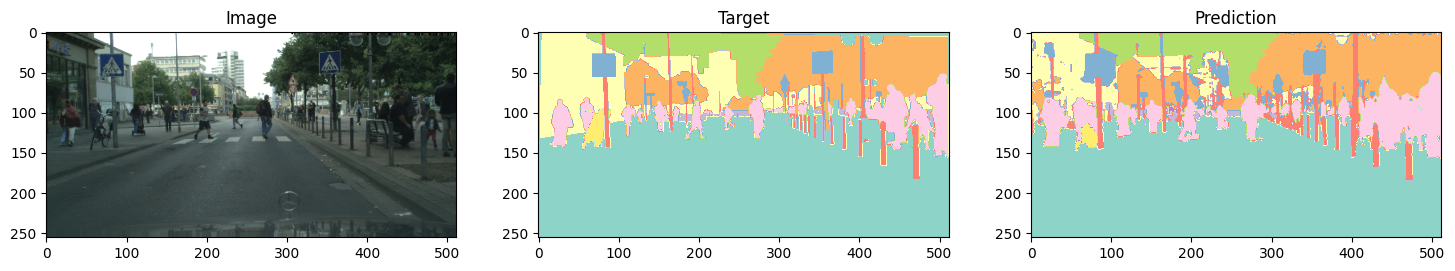

In [8]:
image, target = eval.getRandomImageAndTarget(val_set)
prediction = eval.predict(image, model,'cuda', subsize)
eval.showImageTargetAndPrediction(image, target, prediction)
#eval.showPixelValues(image)